# Code for Producing Figure 3

### From the paper:  
**"The Cultural Macroevolution of Arcade Video Games: Innovation, Collaboration, and Collapse"**  

**Authors:**  
Sergi Valverde, Blai Vidiella, Andrej Spiridonov, R. Alexander Bentley  

**Date:** May 2th, 2025  
**Location:** Barcelona  

This notebook generates **Figure 3**, which visualizes the **morphospace of arcade video games** by analyzing the relationship between **ROM size and CPU speed** over time. The figure highlights key evolutionary trends, including:  
- **Density distributions** of ROM size and CPU speed across different categories.  
- **Power-law scaling relationships** derived from log-log regression.  
- **Comparative morphospaces** for niche genres, including **Shooters and Driving games**.  
- **Collapsing subcategories** where imitation ("bootleg") outpaced collaboration.  

**Data Source**  
- The script loads data from `arcade.csv`, a dataset containing arcade game information.  
- Each row represents an arcade game with attributes such as:  
  - `main_category` (e.g., Shooter, Fighter, Maze)  
  - `sub_category` (e.g., Aerial Combat, Gun-Based)  
  - `log_rom_size` (log-transformed ROM storage size)  
  - `log_clock_speed` (log-transformed CPU clock speed)  
  - `collaboration` (e.g., bootleg vs. collaboration)  
  
**Requirements**  
This notebook requires the following libraries:  
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde, linregress

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.tight_layout()

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress, gaussian_kde, t



<Figure size 640x480 with 0 Axes>

In [ ]:
# Load dataset
df_prod = pd.read_csv("arcade.csv")
print(df_prod.info())

# Create dictionary mapping from category_id to (main_category, sub_category)
category_map = (
    df_prod
    .drop_duplicates(subset="category_id")[["category_id", "main_category", "sub_category"]]
    .set_index("category_id")
    .apply(tuple, axis=1)
    .to_dict()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7822 entries, 0 to 7821
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7822 non-null   int64  
 1   year             7822 non-null   float64
 2   title            7822 non-null   object 
 3   firm             7822 non-null   object 
 4   firm_id          7822 non-null   int64  
 5   log_rom_size     7822 non-null   float64
 6   log_clock_speed  7822 non-null   float64
 7   collaboration    7822 non-null   object 
 8   main_category    7822 non-null   object 
 9   sub_category     7822 non-null   object 
 10  category_id      7822 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 672.3+ KB
None


In [ ]:
def get_trait_evo(df):
    """
    Extracts evolutionary traits (ROM size and CPU speed) from the dataset.

    Parameters:
        df (pd.DataFrame): Dataframe containing 'log_rom_size' and 'log_clock_speed'.
    
    Returns:
        tuple: Arrays of ROM sizes and CPU speeds.
    """
    return df["log_rom_size"].values, df["log_clock_speed"].values

def find_collapsing_categories(df, main_cat):
    """
    Identifies subcategories within a main category where imitation ('bootleg') 
    occurs more frequently than collaboration.
    Parameters:
        df (pd.DataFrame): Input DataFrame with 'main_category', 'sub_category', and 'collaboration'.
        main_cat (str): The main category to analyze.
    Returns:
        tuple: (collapsing_subcategories, collapsing_ids)
            - collapsing_subcategories (set): Subcategories where imitation > collaboration.
            - collapsing_ids (list): Unique 'category_id' values for collapsing subcategories.
    """
    print(f"Finding collapsing categories for {main_cat}")
    df_main_cat = df[df["main_category"] == main_cat]
    collapsing = {
        sub_cat
        for sub_cat, group in df_main_cat.groupby("sub_category")
        if group["collaboration"].value_counts().get("bootleg", 0) > group["collaboration"].value_counts().get("collaboration", 0)
    }
    collapsing_ids = df_main_cat[df_main_cat["sub_category"].isin(collapsing)]["category_id"].unique().tolist()
    return collapsing, collapsing_ids

def load_collapsing(df, main_cat="Maze"):
    """
    Loads collapsing subcategories for a given main category.
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        main_cat (str): Main category name.
    Returns:
        pd.DataFrame: Subset of df containing collapsing subcategories.
    """
    _, collapsing_ids = find_collapsing_categories(df, main_cat)

    print(f"Collapsing IDs: {collapsing_ids}")
    for cat_id in collapsing_ids:
        print (category_map[cat_id])
    return df[df["category_id"].isin(collapsing_ids)]

<>:88: SyntaxWarning: invalid escape sequence '\p'
<>:88: SyntaxWarning: invalid escape sequence '\p'
/var/folders/l6/vvmf7y9d5r714l_1n_crjlx8cvgfjr/T/ipykernel_68462/4254526298.py:88: SyntaxWarning: invalid escape sequence '\p'
  label=f"y = {a:.2f} * x$^{{{b:.2f} \pm {ci:.2f}}}$")


a) Full morphospace -----
Fitted power-law: y = 0.01 * x^2.30
Exponent b: 2.2954 ± 0.0456 (95% CI)
R²: 0.5592
b) -----
N = 3261
Fitted power-law: y = 0.01 * x^2.28
Exponent b: 2.2829 ± 0.0657 (95% CI)
R²: 0.5927
c) -----
N = 849
Fitted power-law: y = 0.01 * x^2.75
Exponent b: 2.7452 ± 0.2392 (95% CI)
R²: 0.3776
d) -----
Finding collapsing categories for Shooter
Collapsing IDs: [8, 15, 35, 86]
('Shooter', 'Gallery')
('Shooter', 'Command')
('Shooter', 'Misc. Horizontal')
('Shooter', '2.5D')
Fitted power-law: y = 0.02 * x^1.88
Exponent b: 1.8782 ± 0.2689 (95% CI)
R²: 0.2666
e) -----
Fitted power-law: y = 0.03 * x^1.99
Exponent b: 1.9939 ± 0.2826 (95% CI)
R²: 0.3046


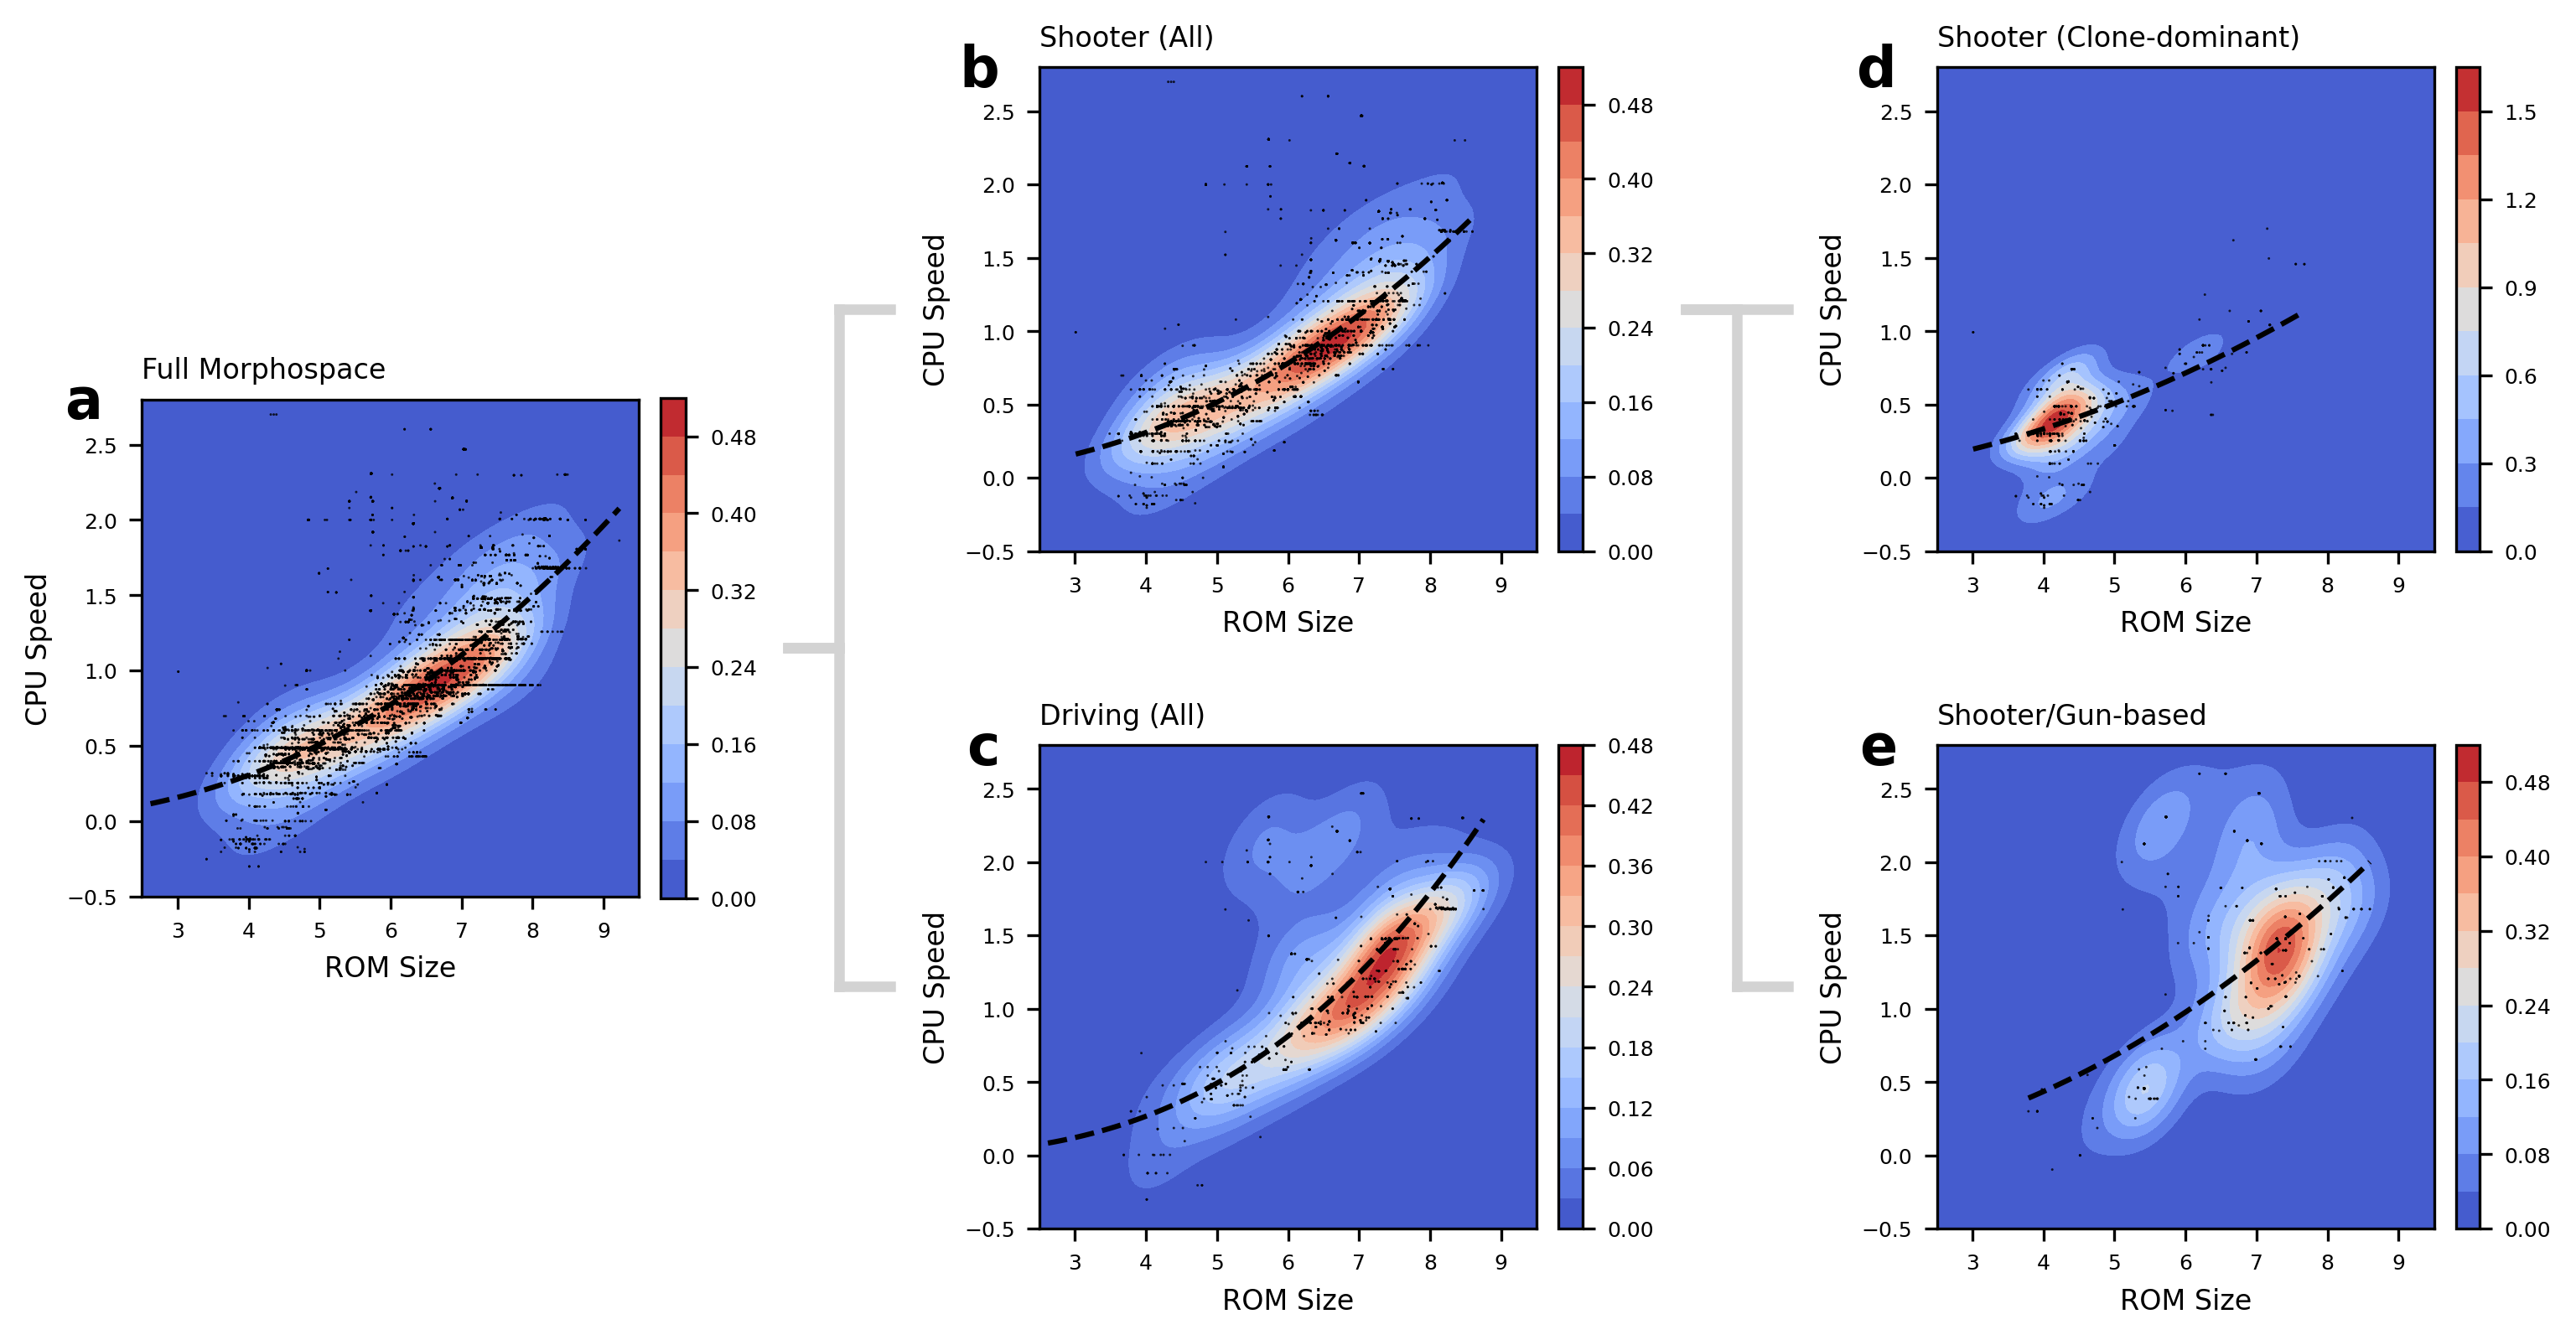

In [ ]:
def connect_axes_orthogonal(ax_from, ax_to, fig, orientation='horizontal'):
    # Use updated bounding boxes
    bb_from = ax_from.get_position()
    bb_to = ax_to.get_position()

    w = 0.3 * (bb_from.x1 - bb_from.x0 ) 
    # Compute midpoint on the visible layout
    x_start = bb_from.x1 + w
    y_start = (bb_from.y0 + bb_from.y1) / 2  # NEW: always accurate after resizing

    x_end = bb_to.x0 - w
    y_end = (bb_to.y0 + bb_to.y1) / 2

    lw = 3.0

    if orientation == 'horizontal':
        x_mid = (x_start + x_end) / 2
        # Draw L-shaped connector behind
        fig.lines.extend([
            Line2D([x_start, x_mid], [y_start, y_start], transform=fig.transFigure,
                   color='lightgray', linestyle='-', linewidth=lw, alpha=1, zorder=-10),
            Line2D([x_mid, x_mid], [y_start, y_end], transform=fig.transFigure,
                   color='lightgray', linestyle='-', linewidth=lw,  alpha=1, zorder=-10),
            Line2D([x_mid, x_end], [y_end, y_end], transform=fig.transFigure,
                   color='lightgray', linestyle='-', linewidth=lw,  alpha=1,  zorder=-10)
        ])



def plot_morphospace(rom, speed, fig, ax):
    """
    Plots the morphospace of ROM size vs. CPU speed with KDE and power-law fit.
    Computes confidence intervals for the power-law exponent.
    
    Parameters:
        rom (array-like): Log-transformed ROM sizes.
        speed (array-like): Log-transformed CPU speeds.
        title (str): Title for the plot.
    """
    # Compute KDE
    x_grid = np.linspace(2.5, 9.5, 100)
    y_grid = np.linspace(-0.5, 2.8, 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    kde = gaussian_kde([rom, speed], bw_method=0.4)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Create plot
    contour = ax.contourf(X, Y, Z, levels=15, cmap="coolwarm")
    ax.scatter(rom, speed, s=0.5, color="black", alpha=0.8, edgecolors='none')
    
    # Add colorbar with adjusted parameters
    cbar = fig.colorbar(contour, ax=ax, fraction=0.046, pad=0.04)  # Adjust size with fraction and padding
    # cbar.set_label("Density", fontsize=8)  # Adjust the label font size
    cbar.ax.tick_params(labelsize=6)  # Adjust the size of the tick labels

    # Set axis properties
    ax.set_xlim(2.5, 9.5)
    ax.set_ylim(-0.5, 2.8)
    ax.set_xlabel("ROM Size", fontsize=8)
    ax.set_ylabel("CPU Speed", fontsize=8)
    # Adjust the size of xticks and yticks
    ax.tick_params(axis='x', labelsize=6)  # Adjust x-tick label size
    ax.tick_params(axis='y', labelsize=6)  # Adjust y-tick label size

    # Log-log regression
    valid_indices = (rom > 0) & (speed > 0)
    rom_filtered, speed_filtered = np.array(rom)[valid_indices], np.array(speed)[valid_indices]
    log_x, log_y = np.log(rom_filtered), np.log(speed_filtered)

    # Perform regression
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    a = np.exp(intercept)
    b = slope

    # Compute 95% confidence interval
    n = len(log_x)
    dof = n - 2  # degrees of freedom
    t_val = t.ppf(0.975, dof)  # two-sided 95% CI
    ci = t_val * std_err
    lower_b = b - ci
    upper_b = b + ci

    # Plot power-law fit
    x_fit = np.linspace(min(rom_filtered), max(rom_filtered), 100)
    y_fit = a * x_fit**b

    ax.plot(x_fit, y_fit, color="k", linestyle="dashed", 
             label=f"y = {a:.2f} * x$^{{{b:.2f} \pm {ci:.2f}}}$")

    # ax.legend()

    # Output stats
    print(f"Fitted power-law: y = {a:.2f} * x^{b:.2f}")
    print(f"Exponent b: {b:.4f} ± {ci:.4f} (95% CI)")
    print(f"R²: {r_value**2:.4f}")


def center_visually_square(ax):
    fig = ax.figure
    pos = ax.get_position()

    # Get width and figure size in inches
    width = pos.width
    fig_w, fig_h = fig.get_size_inches()
    fig_aspect = fig_w / fig_h 

    # Calculate height that makes ax_a visually square
    square_height = width * fig_aspect
    center_y = (pos.y0 + pos.y1) / 2
    new_y0 = center_y - square_height / 2
    new_y1 = center_y + square_height / 2

    # Clamp to figure bounds
    new_y0 = max(0, new_y0)
    new_y1 = min(1, new_y1)

    ax.set_position([pos.x0, new_y0, width, new_y1 - new_y0])

    
# Create figure and layout
fig = plt.figure(figsize=(12, 6), dpi=300)
# Adjust `wspace` to increase horizontal space between columns
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[1, 1], wspace=0.65, hspace=0.4)
# gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[1, 1], wspace=0.3, hspace=0.4)

# Create ax_a to span both rows of column 0
print ("a) Full morphospace -----")
ax_a = fig.add_subplot(gs[:, 0])  # Full morphospace
rom, speed = get_trait_evo(df_prod)
plot_morphospace(rom, speed, fig, ax_a)
center_visually_square(ax_a)      # Apply the square centering fix

print ("b) -----")
ax_b = fig.add_subplot(gs[0, 1])    # Panel b
df_niche = df_prod[df_prod["main_category"] == "Shooter"]
print(f"N = {len(df_niche)}")
rom, speed = get_trait_evo(df_niche)
plot_morphospace(rom, speed, fig, ax_b)

print ("c) -----")
ax_c = fig.add_subplot(gs[1, 1])      # Panel c
df_niche = df_prod[df_prod["main_category"] == "Driving"]
print(f"N = {len(df_niche)}")
rom, speed = get_trait_evo(df_niche)
plot_morphospace(rom, speed, fig, ax_c)

print ("d) -----")
ax_d = fig.add_subplot(gs[0, 2])      # Panel d
# Load and analyze collapsing shooter subcategories
df_sub = load_collapsing(df_prod, "Shooter")
rom, speed = get_trait_evo(df_sub)
subcat_name = df_sub["sub_category"].unique()[0]  # Extract subcategory name
plot_morphospace(rom, speed, fig, ax_d)

print ("e) -----")
ax_e = fig.add_subplot(gs[1, 2])      # Panel e
subcat = 12
df_sub = df_prod[df_prod["category_id"] == subcat]
rom, speed = get_trait_evo(df_sub)
subcat_name = df_sub["sub_category"].unique()[0]  # Extract subcategory name
plot_morphospace(rom, speed, fig, ax_e)

# Draw orthogonal connectors
connect_axes_orthogonal(ax_a, ax_b, fig)
connect_axes_orthogonal(ax_a, ax_c, fig)
connect_axes_orthogonal(ax_b, ax_d, fig)
connect_axes_orthogonal(ax_b, ax_e, fig)

# Placeholder insets
if 0:
    for ax, label, pos in zip([ax_b, ax_c, ax_d, ax_e], 
                            ['Plane', 'Car', 'Invaders', 'Cabinet'],
                            [(0.05, 0.6), (0.05, 0.6), (0.05, 0.6), (0.05, 0.6)]):
        rect = Rectangle(pos, 0.25, 0.25, transform=ax.transAxes,
                        edgecolor='gray', facecolor='lightgray', zorder=10)
        ax.add_patch(rect)
        ax.text(pos[0]+0.02, pos[1]+0.11, label, transform=ax.transAxes,
                fontsize=6, color='black', zorder=11)

# Titles
for ax, title in zip([ax_a, ax_b, ax_c, ax_d, ax_e],
        ['Full Morphospace', 'Shooter (All)', 'Driving (All)',
         'Shooter (Clone-dominant)', 'Shooter/Gun-based']):
    ax.set_title(title, fontsize=8, loc='left')


# Add subplot labels a, b, c, d, e
labels = ['a', 'b', 'c', 'd', 'e']
axes = [ax_a, ax_b, ax_c, ax_d, ax_e]
for ax, label in zip(axes, labels):
    ax.text(-0.08, 1.05, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')


plt.savefig("fig3.svg", dpi=300, bbox_inches='tight')
# plt.savefig("morphospace.png", dpi=300, bbox_inches='tight')
# plt.tight_layout()
plt.show()

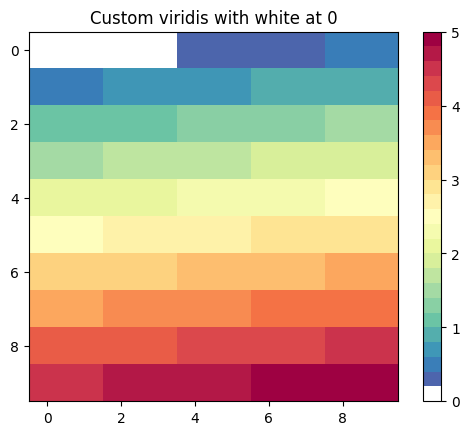

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Example data
data = np.linspace(0, 5, 100).reshape(10, 10)

# Define data range
vmin, vmax = 0, 5
n_colors = 25

# Get the base colormap (viridis in this case)
base_cmap = plt.cm.Spectral_r

# Convert to a ListedColormap (an editable array of colors)
colors = base_cmap(np.linspace(0, 1, n_colors))
custom_cmap = ListedColormap(colors)

# Find the index corresponding to 0 in the data range
zero_index = int((0 - vmin) / (vmax - vmin) * (n_colors - 1))

# Replace the color at 0 with white
colors[zero_index] = [1, 1, 1, 1]  # RGBA for white
custom_cmap = ListedColormap(colors)

# Plot using the modified colormap
plt.imshow(data, cmap=custom_cmap, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title("Custom viridis with white at 0")
plt.show()

<>:88: SyntaxWarning: invalid escape sequence '\p'
<>:88: SyntaxWarning: invalid escape sequence '\p'
/var/folders/l6/vvmf7y9d5r714l_1n_crjlx8cvgfjr/T/ipykernel_68462/3352156967.py:88: SyntaxWarning: invalid escape sequence '\p'
  label=f"y = {a:.2f} * x$^{{{b:.2f} \pm {ci:.2f}}}$")


a) Full morphospace -----
Fitted power-law: y = 0.01 * x^2.30
Exponent b: 2.2954 ± 0.0456 (95% CI)
R²: 0.5592
b) -----
N = 3261
Fitted power-law: y = 0.01 * x^2.28
Exponent b: 2.2829 ± 0.0657 (95% CI)
R²: 0.5927
c) -----
N = 849
Fitted power-law: y = 0.01 * x^2.75
Exponent b: 2.7452 ± 0.2392 (95% CI)
R²: 0.3776
d) -----
Finding collapsing categories for Shooter
Collapsing IDs: [8, 15, 35, 86]
('Shooter', 'Gallery')
('Shooter', 'Command')
('Shooter', 'Misc. Horizontal')
('Shooter', '2.5D')
Fitted power-law: y = 0.02 * x^1.88
Exponent b: 1.8782 ± 0.2689 (95% CI)
R²: 0.2666
e) -----
Fitted power-law: y = 0.03 * x^1.99
Exponent b: 1.9939 ± 0.2826 (95% CI)
R²: 0.3046


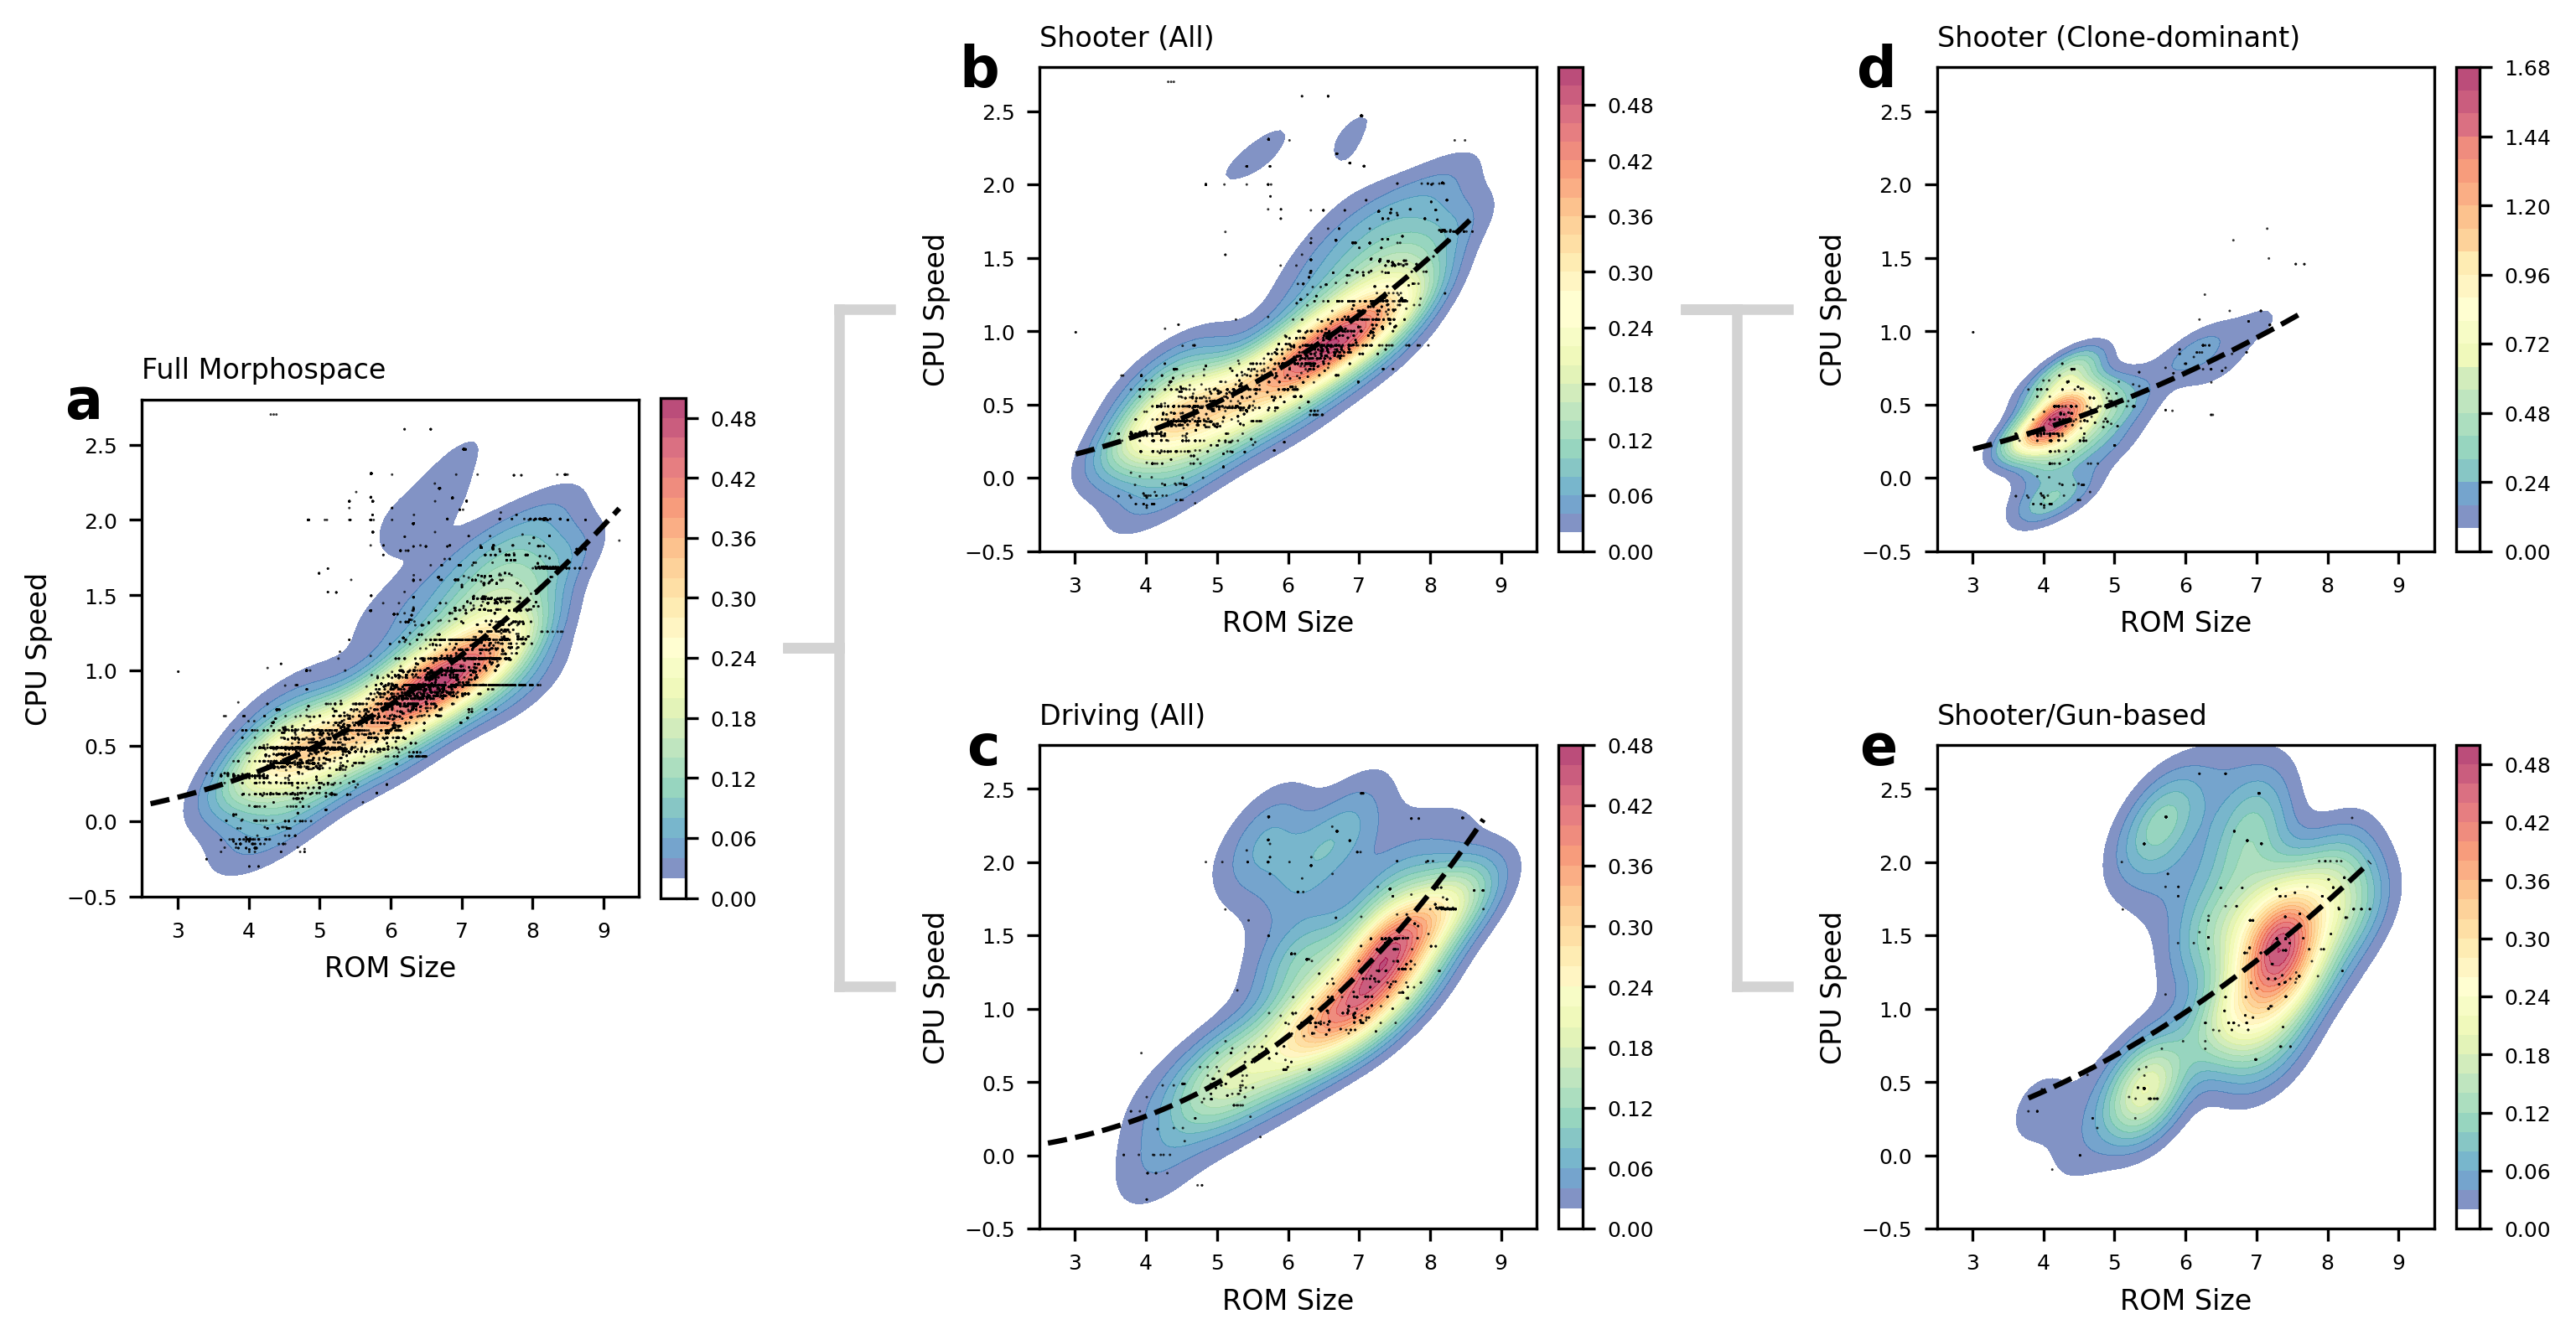

In [ ]:
def connect_axes_orthogonal(ax_from, ax_to, fig, orientation='horizontal'):
    # Use updated bounding boxes
    bb_from = ax_from.get_position()
    bb_to = ax_to.get_position()

    w = 0.3 * (bb_from.x1 - bb_from.x0 ) 
    # Compute midpoint on the visible layout
    x_start = bb_from.x1 + w
    y_start = (bb_from.y0 + bb_from.y1) / 2  # NEW: always accurate after resizing

    x_end = bb_to.x0 - w
    y_end = (bb_to.y0 + bb_to.y1) / 2

    lw = 3.0

    if orientation == 'horizontal':
        x_mid = (x_start + x_end) / 2
        # Draw L-shaped connector behind
        fig.lines.extend([
            Line2D([x_start, x_mid], [y_start, y_start], transform=fig.transFigure,
                   color='lightgray', linestyle='-', linewidth=lw, alpha=1, zorder=-10),
            Line2D([x_mid, x_mid], [y_start, y_end], transform=fig.transFigure,
                   color='lightgray', linestyle='-', linewidth=lw,  alpha=1, zorder=-10),
            Line2D([x_mid, x_end], [y_end, y_end], transform=fig.transFigure,
                   color='lightgray', linestyle='-', linewidth=lw,  alpha=1,  zorder=-10)
        ])



def plot_morphospace(rom, speed, fig, ax):
    """
    Plots the morphospace of ROM size vs. CPU speed with KDE and power-law fit.
    Computes confidence intervals for the power-law exponent.
    
    Parameters:
        rom (array-like): Log-transformed ROM sizes.
        speed (array-like): Log-transformed CPU speeds.
        title (str): Title for the plot.
    """
    # Compute KDE
    x_grid = np.linspace(2.5, 9.5, 100)
    y_grid = np.linspace(-0.5, 2.8, 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    kde = gaussian_kde([rom, speed], bw_method=0.4)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Create plot
    contour = ax.contourf(X, Y, Z, levels=25, cmap=custom_cmap,vmin=0,alpha=0.7)
    ax.scatter(rom, speed, s=0.5, color="black", alpha=0.8, edgecolors='none')
    
    # Add colorbar with adjusted parameters
    cbar = fig.colorbar(contour, ax=ax, fraction=0.046, pad=0.04)  # Adjust size with fraction and padding
    # cbar.set_label("Density", fontsize=8)  # Adjust the label font size
    cbar.ax.tick_params(labelsize=6)  # Adjust the size of the tick labels

    # Set axis properties
    ax.set_xlim(2.5, 9.5)
    ax.set_ylim(-0.5, 2.8)
    ax.set_xlabel("ROM Size", fontsize=8)
    ax.set_ylabel("CPU Speed", fontsize=8)
    # Adjust the size of xticks and yticks
    ax.tick_params(axis='x', labelsize=6)  # Adjust x-tick label size
    ax.tick_params(axis='y', labelsize=6)  # Adjust y-tick label size

    # Log-log regression
    valid_indices = (rom > 0) & (speed > 0)
    rom_filtered, speed_filtered = np.array(rom)[valid_indices], np.array(speed)[valid_indices]
    log_x, log_y = np.log(rom_filtered), np.log(speed_filtered)

    # Perform regression
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    a = np.exp(intercept)
    b = slope

    # Compute 95% confidence interval
    n = len(log_x)
    dof = n - 2  # degrees of freedom
    t_val = t.ppf(0.975, dof)  # two-sided 95% CI
    ci = t_val * std_err
    lower_b = b - ci
    upper_b = b + ci

    # Plot power-law fit
    x_fit = np.linspace(min(rom_filtered), max(rom_filtered), 100)
    y_fit = a * x_fit**b

    ax.plot(x_fit, y_fit, color="k", linestyle="dashed", 
             label=f"y = {a:.2f} * x$^{{{b:.2f} \pm {ci:.2f}}}$")

    # ax.legend()

    # Output stats
    print(f"Fitted power-law: y = {a:.2f} * x^{b:.2f}")
    print(f"Exponent b: {b:.4f} ± {ci:.4f} (95% CI)")
    print(f"R²: {r_value**2:.4f}")


def center_visually_square(ax):
    fig = ax.figure
    pos = ax.get_position()

    # Get width and figure size in inches
    width = pos.width
    fig_w, fig_h = fig.get_size_inches()
    fig_aspect = fig_w / fig_h 

    # Calculate height that makes ax_a visually square
    square_height = width * fig_aspect
    center_y = (pos.y0 + pos.y1) / 2
    new_y0 = center_y - square_height / 2
    new_y1 = center_y + square_height / 2

    # Clamp to figure bounds
    new_y0 = max(0, new_y0)
    new_y1 = min(1, new_y1)

    ax.set_position([pos.x0, new_y0, width, new_y1 - new_y0])

    
# Create figure and layout
fig = plt.figure(figsize=(12, 6), dpi=300)
# Adjust `wspace` to increase horizontal space between columns
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[1, 1], wspace=0.65, hspace=0.4)
# gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[1, 1], wspace=0.3, hspace=0.4)

# Create ax_a to span both rows of column 0
print ("a) Full morphospace -----")
ax_a = fig.add_subplot(gs[:, 0])  # Full morphospace
rom, speed = get_trait_evo(df_prod)
plot_morphospace(rom, speed, fig, ax_a)
center_visually_square(ax_a)      # Apply the square centering fix

print ("b) -----")
ax_b = fig.add_subplot(gs[0, 1])    # Panel b
df_niche = df_prod[df_prod["main_category"] == "Shooter"]
print(f"N = {len(df_niche)}")
rom, speed = get_trait_evo(df_niche)
plot_morphospace(rom, speed, fig, ax_b)

print ("c) -----")
ax_c = fig.add_subplot(gs[1, 1])      # Panel c
df_niche = df_prod[df_prod["main_category"] == "Driving"]
print(f"N = {len(df_niche)}")
rom, speed = get_trait_evo(df_niche)
plot_morphospace(rom, speed, fig, ax_c)

print ("d) -----")
ax_d = fig.add_subplot(gs[0, 2])      # Panel d
# Load and analyze collapsing shooter subcategories
df_sub = load_collapsing(df_prod, "Shooter")
rom, speed = get_trait_evo(df_sub)
subcat_name = df_sub["sub_category"].unique()[0]  # Extract subcategory name
plot_morphospace(rom, speed, fig, ax_d)

print ("e) -----")
ax_e = fig.add_subplot(gs[1, 2])      # Panel e
subcat = 12
df_sub = df_prod[df_prod["category_id"] == subcat]
rom, speed = get_trait_evo(df_sub)
subcat_name = df_sub["sub_category"].unique()[0]  # Extract subcategory name
plot_morphospace(rom, speed, fig, ax_e)

# Draw orthogonal connectors
connect_axes_orthogonal(ax_a, ax_b, fig)
connect_axes_orthogonal(ax_a, ax_c, fig)
connect_axes_orthogonal(ax_b, ax_d, fig)
connect_axes_orthogonal(ax_b, ax_e, fig)

# Placeholder insets
if 0:
    for ax, label, pos in zip([ax_b, ax_c, ax_d, ax_e], 
                            ['Plane', 'Car', 'Invaders', 'Cabinet'],
                            [(0.05, 0.6), (0.05, 0.6), (0.05, 0.6), (0.05, 0.6)]):
        rect = Rectangle(pos, 0.25, 0.25, transform=ax.transAxes,
                        edgecolor='gray', facecolor='lightgray', zorder=10)
        ax.add_patch(rect)
        ax.text(pos[0]+0.02, pos[1]+0.11, label, transform=ax.transAxes,
                fontsize=6, color='black', zorder=11)

# Titles
for ax, title in zip([ax_a, ax_b, ax_c, ax_d, ax_e],
        ['Full Morphospace', 'Shooter (All)', 'Driving (All)',
         'Shooter (Clone-dominant)', 'Shooter/Gun-based']):
    ax.set_title(title, fontsize=8, loc='left')


# Add subplot labels a, b, c, d, e
labels = ['a', 'b', 'c', 'd', 'e']
axes = [ax_a, ax_b, ax_c, ax_d, ax_e]
for ax, label in zip(axes, labels):
    ax.text(-0.08, 1.05, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')


plt.savefig("fig3.svg", dpi=300, bbox_inches='tight')
# plt.savefig("morphospace.png", dpi=300, bbox_inches='tight')
# plt.tight_layout()
plt.show()